In [16]:
# Import necessary packages
import sys
import json
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Get data file
file = "FRF1.h5"
data = h5py.File(str(file), "r")

In [18]:
# Position, Velocity & Acceleration
## Note: COL -> Number of Periods
pose = data["/Config_Time/POSE"][:].squeeze()
vel = data["/Config_Time/VELOCITY"][:].squeeze()
acc = data["/Config_Time/ACCELERATION"][:].squeeze()
time = data["/Config_Time/Time"][:].squeeze()
# Frequency of Periodic Solution
T = data["/T"][:]
n_solpoints = len(T)

In [19]:
# Each column is a 
pose.shape, vel.shape, acc.shape, time.shape, T.shape

((301, 148), (301, 148), (301, 148), (148, 301), (148,))

In [27]:
# Forcing Amplitude of FRC --> F*cos(2pi/T*t + phi)
par = data["/Parameters"]
par = json.loads(par[()])
amp = par["forcing"]["amplitude"]
phase_ratio = par["forcing"]["phase_ratio"]

F = np.zeros_like(acc)
for i in range (n_solpoints):
    F[:, i] = amp * np.cos(2 * np.pi / T[i] * time[i, :] + phase_ratio)

Text(0, 0.5, 'Amplitude, $x$')

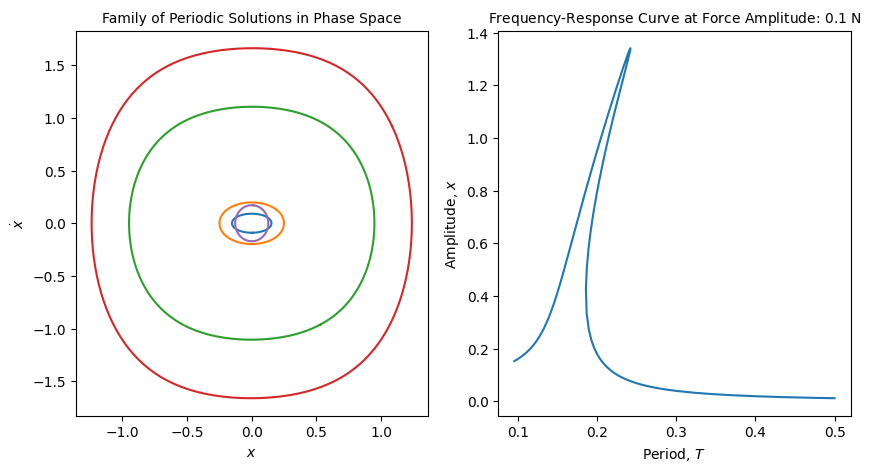

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot Family of Periodic Solutions in Phase Space
ax[0].set_title('Family of Periodic Solutions in Phase Space', fontsize=10)
ax[0].plot(pose[:, ::30], vel[:, ::30])
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$\dot{x}$')

# Plot NLFR
ax[1].set_title(f'Frequency-Response Curve at Force Amplitude: ${amp}$ N', fontsize=10)
ax[1].plot(1/T, np.max(pose, axis=0))
ax[1].set_xlabel(r'Period, $T$')
ax[1].set_ylabel(r'Amplitude, $x$')